### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

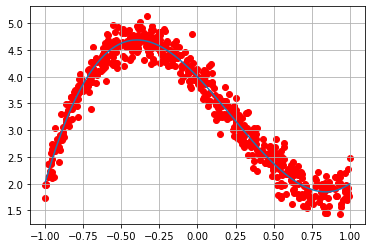

In [0]:
def poli3(x):
  return 4.-3.*x-2.*(x)**2+3*x**3

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x_train = np.random.uniform(-1., 1., 6000)
x_valid = np.random.uniform(-1., 1., 600)
x_valid.sort()
y_target = poli3(x_valid)

sigma = 0.2 ##noise
y_train = np.random.normal(poli3(x_train), sigma)
y_valid = np.random.normal(poli3(x_valid), sigma)

plt.figure()
plt.plot(x_valid,y_target)
plt.scatter(x_valid, y_valid, color = 'r')
plt.grid(True)
plt.show()

In [0]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
#numero di neuroni nel primo "hidden layer" e 1 parametro di input
model.add(Dense(3, input_shape=(1,), activation='tanh'))
model.add(Dense(3, activation='tanh'))
#model.add(Dense(3, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(x=x_train, y=y_train, batch_size=50, epochs=100, shuffle=True,validation_data=(x_valid,y_valid), verbose=0)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


12/12 [==============================] - 0s 1ms/step - loss: 0.0435 - mse: 0.0435

Test loss: 0.043489500880241394
Test Accuracy: 0.043489500880241394
12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025

Test loss: 0.002549067372456193
Test Accuracy: 0.002549067372456193


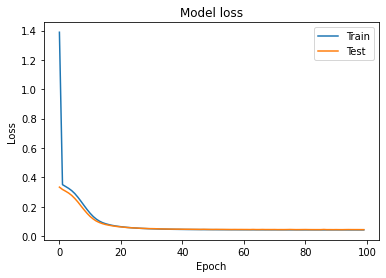

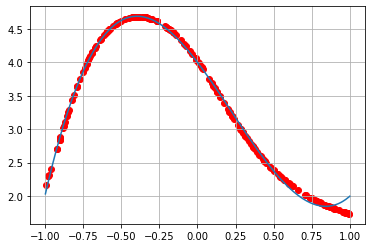

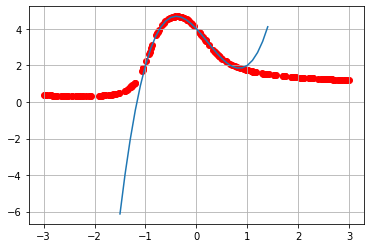

In [0]:
score = model.evaluate(x_valid, y_valid, batch_size=50,verbose=1)

print()
print('Test loss:', score[0])
print('Test Accuracy:',score[1])

score = model.evaluate(x_valid, y_target, batch_size=50,verbose=1)

print()
print('Test loss:', score[0])
print('Test Accuracy:',score[1])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best'); plt.show()


x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')

#x_predicted.sort()
plt.plot(x_valid, y_target)
plt.grid(True);plt.show()

x_new=np.arange(-1.5,1.5,0.1)
x_predicted2 = np.random.uniform(-3, 3, 200)
y_predicted2 = model.predict(x_predicted2)
y_new = poli3(x_new)

plt.scatter(x_predicted2, y_predicted2,color='r')
x_predicted.sort()
plt.plot(x_new, y_new)
plt.grid(True);plt.show()

plt.show()

La funzione di cui ottenere il fit è un polinomio di grado  3,
perciò ci si aspetterebbe che 4
parametri siano sufficienti per raggiungere l'obiettivo. 
Impostando la rete con due soli neuroni, in modo tale da poter gestire 4 parametri, qualunque sia la funzione di attivazione, ottengo dei risultati pessimi:


*   Test loss: 0.23596857488155365
*   Test Accuracy: 0.23596857488155365

Allora aumento il numero di layer e neuroni, così da aumentare il numero parametri. 
Provo a modifcare la rete uno step per volta, incrementando ogni volta di poco la sua complessità. 
I primi risultati soddisfacenti li ottengo con la seguente configurazione:


*   Layer input di 3 neuroni
*   1 hidden layer con 3 neuroni

*   Layer output con 1 neurone

I risultati sono:


*   Test loss: 0.0018100603483617306
*   Test Accuracy: 0.0018100603483617306

Osservando il plot contenente y target e y predicted noto come il modello funzioni poco nei pressi dell'estremo destro dell'intervallo [-1,1].
Provo  ad aumentare il numero di neuroni o layer, ma il risultato non cambia e tra l'altro si corre il rischio di fare overfitting, ovvero l'aggiunta di troppi parametri.
Una volta raggiunta la configurazione che pare essere ottimale (a livello di layers e neuroni) noto come ricopra un ruolo  importante la funzione di attivazione. Dunque procedo con la modifica di quest'ultima.

Osservo che:
la funzione Relu non è in grado di generare delle curve lisce, a differenza della Sigmoide o della tanh. D'altra parte la sigmoide è una funzione più soft e non riesce bene a seguire le variazioni della funzione. 
Per questo motivo nell'esercizio ho utilizzato dei layers con funzione di attivazione tanh.

Fissata la configurazione della rete e la funzione di attivazione, provo a modificare l'optimizer.
Noto che dagli optimizer possibili, senza utilizzare sgd, ma adagrad o adadelta, la rete non riesce ad imparare e i valori di y_predicted non ricalcano minimamete gli y_target.

Infine, dopo aver fissato optimizer come stochastic gradient descend, provo a modificare le impostazioni della loss function.

I risultati ottenuti con MSE o MAE sono praticamente equivalenti a livello di accuracy del fit.
Utilizzando MSLE invece la rete perde la sua capacità di imparare.

Infine si nota come il modello si adatti bene solamente alla regione di dati su cui è avvenuto il training perdendo totalmente potere predittivo per dati fuori dal range [−1,1].